Non-Linear Regression Part 2
========================

<div class="overview-this-is-a-title overview">
<p class="overview-title">Overview</p>
<p>Questions</p>
    <ul>
        <li> How can I perform statistically robust non-linear regression in a Jupyter notebook?</li>
    </ul>
<p>Objectives:</p>
    <ul>
        <li> Import data from a csv file
        <li> Create a function based on the equation to be fitted
        <li> Generate the best-fit curve with parameters and statistical descriptors
        <li> Create plots of the data
    </ul>
</div>

## Something old, something new
Old: import csv data to a pandas dataframe
New: create a function based on an equation
New: use tools in SciPy to fit the data to the function
Old: plot the data to display your results

In [2]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [3]:
cd ../..

/Users/pac8612/Desktop/python-scripting-biochemistry


### Review the Michaelis-Menten equation

The Michaelis-Menten equation describes kinetics for enzyme-catalyzed reactions. We will use the simplest version of the equation, based on initial reaction velocities with a single substrate.

In our equation,  there are two parameters, V$_{max}$ (maximum velocity) and K$_m$ (the Michaelis constant, which equals the substrate concentration at half maximal velocity), an independent variable, \[S\] = substrate concentration, and a dependent variable, V$_i$, the initial velocity.

$$
V_i = \frac{V_{max} * [S]}{K_m + [S]}
$$

We will use the following variables for our equation:

- Vmax = the maximum velocity
- Km = the Michaelis constant
- SubConc = substrate concentration
- Vi = initial velocity

In [4]:
# create the filehandle
datafile = os.path.join('biochemist-python', 'chapters', 'data', 'MM_data.csv')
# import the data
rates_df = pd.read_csv(datafile)
rates_df # inspect the data to make sure you have substrate concentrations and initial velocities

,pNPP (mM),slopes,initial velocities
0,20.00,0.289251,19.283376
1,10.00,0.278807,18.587156
2,7.00,0.268251,17.883411
3,4.00,0.241399,16.093294
4,2.00,0.206733,13.782214
5,1.00,0.159590,10.639335
6,0.70,0.128901,8.593421
7,0.40,0.091180,6.078658
8,0.20,0.056582,3.772139
9,0.10,0.029607,1.973805


In [18]:
# define the function
def MM(SubConc, Vmax, Km):
    Vi = (Vmax * SubConc)/(Km + SubConc)
    return Vi
# set the data
ydata = rates_df['initial velocities']
xdata = rates_df['pNPP (mM)']
# rates_df

In [19]:
ydata = rates_df('initial velocities') # Common errors and how to read them
# If the errors says "is not callable", you are using parentheses (which call a function) when you should not

TypeError: 'DataFrame' object is not callable

In [20]:
MM(rates_df['initial velocities'], 10, 100)

0     1.616602
1     1.567384
2     1.517042
3     1.386238
4     1.211280
5     0.961623
6     0.791339
7     0.573033
8     0.363502
9     0.193560
10    0.104002
Name: initial velocities, dtype: float64

In [9]:
MM(rates_df['initial velocities'], 10, 100)

0     1.616602
1     1.567384
2     1.517042
3     1.386238
4     1.211280
5     0.961623
6     0.791339
7     0.573033
8     0.363502
9     0.193560
10    0.104002
Name: initial velocities, dtype: float64

In [10]:
# Common Errors - color coding and common features of Jupyter notebooks
# str
# def
# import
# 1s
# In [20]

In [24]:
guess = [10, 100]
parameters, covariance = curve_fit(MM, xdata, ydata, p0 = guess)

In [25]:
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

20.155805072553317
0.9208784450776851


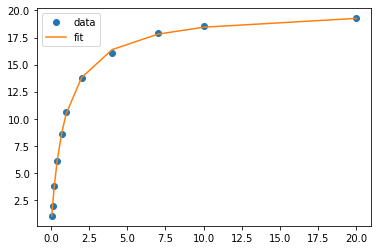

In [26]:
fit_y = MM(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()